This notebook has two parts: 

1) exploratory analysis and

2) building a linear regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan

FlightData = pd.read_csv("flights.csv")
FlightData.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Part 1: Exploratory Analysis

#### 1. How many observations are there? How many features are there?

In [2]:
print("Number of Observations(Rows) are: ",FlightData.shape[0])
print("Number of Features(Columns) are: ",FlightData.shape[1])

Number of Observations(Rows) are:  5821
Number of Features(Columns) are:  31


#### 2. How many different airlines are there? What are their counts?

In [3]:
print ("Number of different Airlines:",FlightData['AIRLINE'].nunique() )
print ("Airline Count",FlightData['AIRLINE'].value_counts(), sep='\n')

Number of different Airlines: 14
Airline Count
WN    1285
DL     922
AA     722
OO     593
EV     563
UA     512
MQ     288
B6     263
US     212
AS     145
NK     119
F9      74
VX      66
HA      57
Name: AIRLINE, dtype: int64


#### 3. How many missing values are there in the departure delays? How about arrival delays? 
####     Do they match? Why or why not? Remove these observations afterwards.

In [4]:
# sum of null values in departure delay 
Dep_Delay = FlightData['DEPARTURE_DELAY'].isnull().sum()
print("Missing values of Departure Delays are:",Dep_Delay)

# sum of null values in arrival delay 
Arvl_Delay=FlightData['ARRIVAL_DELAY'].isnull().sum()
print("Missing values of Arrival Delays are:",Arvl_Delay)

# check (boolean) if both numbers are same
print("Do they match?:", Arvl_Delay == Dep_Delay)

Missing values of Departure Delays are: 91
Missing values of Arrival Delays are: 108
Do they match?: False


In [5]:
# find why observations don't match
FlightData[np.isnan(FlightData.ARRIVAL_DELAY)][['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY',
                                                'SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_TIME']].head()


,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_TIME
1,625,NaN,NaN,755,NaN,NaN
10,1631,NaN,NaN,1815,NaN,NaN
47,1655,NaN,NaN,1748,NaN,NaN
115,1315,NaN,NaN,1450,NaN,NaN
116,1436,NaN,NaN,1535,NaN,NaN


In [6]:
Dep_time = FlightData['DEPARTURE_TIME'].isnull().sum()
print("Missing values of Departure time are:",Dep_time)

Arr_time = FlightData['ARRIVAL_TIME'].isnull().sum()
print("Missing values of Arrival time are:",Arr_time)


Missing values of Departure time are: 91
Missing values of Arrival time are: 94


Observation: Missing values dont match because:

Departure Delay and Arrival delay are calculated based on recorded actual time & scheduled time respectively, i.e. 
Departure Delay = Departure time - Scheduled Departure  

Since, data is not recorded for Departure time (91) & Arrival time (94), there are missing values for Departure Delay and Arrival delay.  

Remaining 14 records for arrival delay (108-94 = 14), have missing values which are not calculated even though there are records for Arrival time and Arrival Departure due to reasons that can be explored further. 



In [7]:
# remove observations with nan for departure and arrival delay
FlightData.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'],inplace = True)
print("New number of Observations(Rows) removing missing values are: ",FlightData.shape[0])

New number of Observations(Rows) removing missing values are:  5713


#### 4. What is the average and median departure and arrival delay? What do you observe?

In [8]:
# data.mean() and data.median()
print('Average Departure delay is ',FlightData['DEPARTURE_DELAY'].mean(), 'and Median Departure delay is',FlightData['DEPARTURE_DELAY'].median())
print('Average Arrival delay is ',FlightData['ARRIVAL_DELAY'].mean(), 'and Median Arrival delay is',FlightData['ARRIVAL_DELAY'].median())


Average Departure delay is  8.886574479257833 and Median Departure delay is -2.0
Average Arrival delay is  3.9882723612812883 and Median Arrival delay is -5.0


Observation: 
Mean and median gives a centre of distribution of data and they are different for this dataset. It is observed that on an average departure delays are around 9 minutes. However, arrival delays on an average are less and almost 4 mintues.
Also, median values reflect that flights actually depart and arrive early, approximately 2 & 5 minutes respectively. However, no conclusion can be drawn yet from mean or median values without diagnosis.

#### 5. Display graphically the departure delays and arrival delays for each airline. What do you notice? Explain.

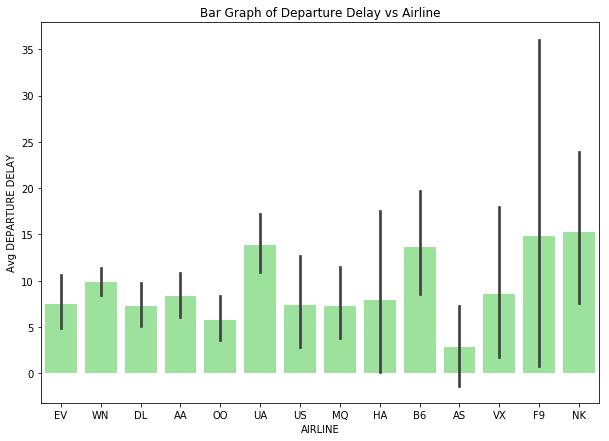

In [9]:
# Departure Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax1 = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=FlightData , color="lightgreen")
plt.xlabel("AIRLINE")
plt.ylabel("Avg DEPARTURE DELAY")
plt.title("Bar Graph of Departure Delay vs Airline")
plt.show()

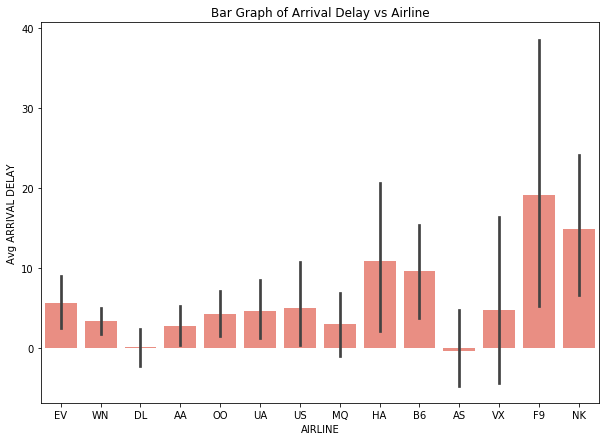

In [10]:
# Arrival Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax2 = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=FlightData, color="salmon" )
plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL DELAY")
plt.title("Bar Graph of Arrival Delay vs Airline")
plt.show()

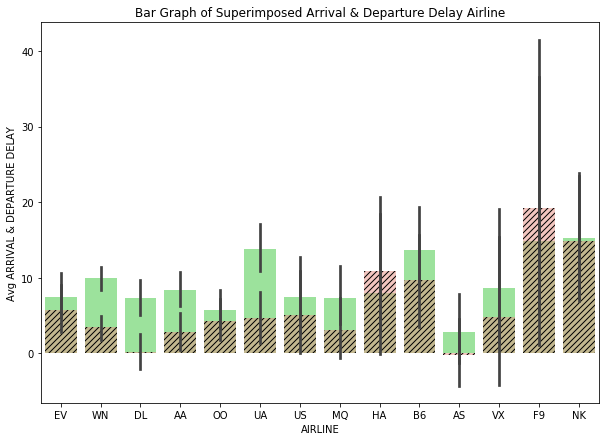

In [11]:
# superimposing both graphs to see difference
fig = plt.figure(1, figsize=(10,7))
labels = ['green','hatch']
ax3 = sns.barplot(y="DEPARTURE_DELAY", x="AIRLINE", data=FlightData, color="lightgreen")
ax3 = sns.barplot(y="ARRIVAL_DELAY", x="AIRLINE", data=FlightData, color="salmon", hatch = '////',alpha = 0.5)

plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL & DEPARTURE DELAY")
plt.title("Bar Graph of Superimposed Arrival & Departure Delay Airline")
plt.show()

Observation: 
It is observed through superimposed graph that departure delays are higher than arrival delays. One can assume that airlines probably increase speed to minimize delays. 

#### 6. Now calculate the 5 number summary (min, Q1, median, Q3, max) of departure delay for each airline. Arrange it by median delay (descending order). Do the same for arrival delay.

In [12]:
# describe to print 5 number summary
# descending order of median = 50%
Dep_Delay = FlightData.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Departure Delay",Dep_Delay.sort_values(by='50%',ascending=False), sep='\n')

Arvl_Delay = FlightData.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Arrival Delay",Arvl_Delay.sort_values(by='50%',ascending=False), sep='\n')


Departure Delay
           max    75%  50%  25%   min
AIRLINE                              
UA       332.0  14.00  1.5 -3.0 -12.0
WN       224.0  10.00  0.0 -3.0 -10.0
B6       330.0  11.00 -1.0 -5.0 -18.0
VX       230.0   3.25 -1.5 -4.0  -9.0
AA       289.0   7.00 -2.0 -5.0 -14.0
DL       419.0   3.00 -2.0 -4.0 -14.0
NK       353.0  20.00 -2.0 -6.0 -14.0
EV       382.0   4.00 -3.0 -6.0 -15.0
HA       202.0   1.00 -3.0 -6.0 -12.0
MQ       311.0   6.00 -3.0 -5.0 -13.0
OO       306.0   2.00 -3.0 -7.0 -23.0
US       345.0   2.75 -3.0 -5.0 -11.0
AS       186.0   2.00 -4.0 -8.0 -27.0
F9       650.0   4.00 -4.0 -7.0 -15.0
Arrival Delay
           max    75%  50%    25%   min
AIRLINE                                
F9       644.0  15.00  1.0  -9.00 -25.0
HA       194.0  10.00 -1.0  -5.00 -29.0
NK       354.0  23.00 -2.0 -10.75 -36.0
OO       304.0   8.00 -3.0 -12.00 -42.0
EV       386.0   8.00 -4.0 -12.00 -36.0
US       334.0  11.00 -4.0 -13.00 -42.0
WN       273.0   8.00 -4.0 -12.00 -53.0
B6

#### 7. Which airport has the most averaged departure delay? Give me the top 10 airports. Why do you think the number 1 airport has that much delay?

In [13]:
Avg_dep_delay = FlightData.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
print(Avg_dep_delay.head(10))

ORIGIN_AIRPORT
FAR      161.000000
12898    119.000000
BMI      101.333333
ERI       92.000000
14696     88.000000
MYR       88.000000
14576     88.000000
10157     87.500000
12992     80.000000
12206     67.500000
Name: DEPARTURE_DELAY, dtype: float64


In [14]:
# find cause by count of various delay reasons at FAR
FlightData[FlightData['ORIGIN_AIRPORT']=='FAR'][['DEPARTURE_DELAY',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','AIR_TIME', 'DISTANCE']]

,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_TIME,DISTANCE
2991,161.0,175.0,0,0,NaN,100.0,0.0,0.0,75.0,0.0,88.0,557


Observation: 'FAR' origin airport has highest average departure delay. But there is only one observation for this airport with departure delay of 175 min and arrival delay of 161 min. The flight was not diverted or cancelled but the flight was delayed due to air system delay of 100 min and aircraft delay of 75 min.

#### 8. Do you expect the departure delay has anything to do with distance of trip? What about arrival delay and distance? Prove your claims.

In [15]:
Distance_corr = FlightData[['DISTANCE', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Distance_corr.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.023095,-0.027935
DEPARTURE_DELAY,0.023095,1.000000,0.936069
ARRIVAL_DELAY,-0.027935,0.936069,1.000000


Observation: Correlation matrix shows a very low correlation of distance with both departure and arrival delays.

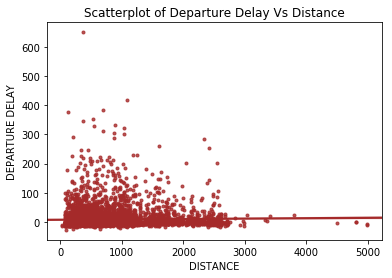

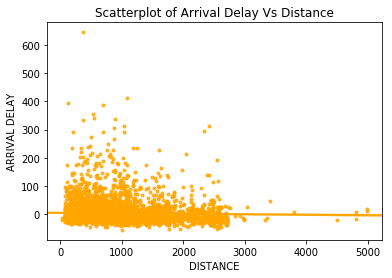

In [16]:
# scatter plot with regression line

scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'DEPARTURE_DELAY', data = FlightData, color = "brown",marker = '.' )

ax.set_title('Scatterplot of Departure Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('DEPARTURE DELAY')

plt.show()

# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = FlightData, color = "orange", marker = '.')

ax.set_title('Scatterplot of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()

Observation: With further diagnosis, scatter plot shows no particular pattern or trend of distance with departure or arrival delay. If we plot a regression line, it is almost parallel to X axis which implies predictor Distance has no implication on Departure or Arrival Delay. The same was shown in correlation matrix.


#### 9. What about day of week vs departure delay?

In [17]:
Week_corr= FlightData[['DAY_OF_WEEK', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Week_corr.corr()

,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,-0.004786,-0.008692
DEPARTURE_DELAY,-0.004786,1.000000,0.936069
ARRIVAL_DELAY,-0.008692,0.936069,1.000000


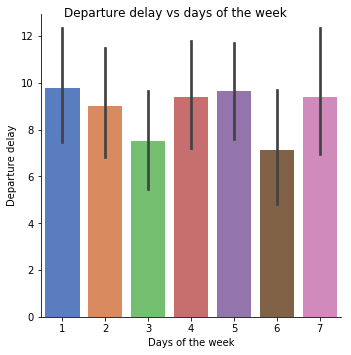

In [18]:
# Graph showing variation in departure delay as per day of the week.
ax = sns.catplot(x = 'DAY_OF_WEEK', y = 'DEPARTURE_DELAY', data = FlightData , kind = "bar", palette = "muted")

ax.set_xlabels('Days of the week')
ax.set_ylabels('Departure delay')

ax.fig.suptitle('Departure delay vs days of the week')

plt.show()


Observation: Graph shows no trend therefore, departure delays does not have any relation with the days of the week. It is also seen in the correlation matrix where the value is extremely low (-0.004) between the two. 


#### 10. If there is a departure delay (i.e. positive values for departure delay), does distance have anything to do with arrival delay? Explain. (My experience has been that longer distance ights can make up more time.)

In [19]:
# Create dataframe with positive departure delays only
FD_dep_delay= FlightData[FlightData['DEPARTURE_DELAY']>0][['AIRLINE','DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

# check correlation
FD_dep_delay.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,-0.044285,-0.094924
DEPARTURE_DELAY,-0.044285,1.000000,0.960662
ARRIVAL_DELAY,-0.094924,0.960662,1.000000


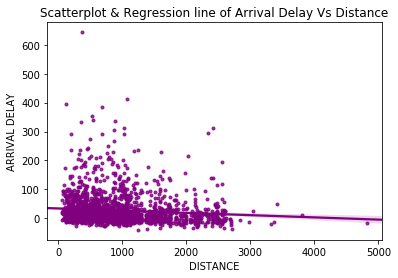

In [20]:
# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = FD_dep_delay, color = "purple",marker = '.')

ax.set_title('Scatterplot & Regression line of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()

Observation: Graph still shows arrival delays does not have any relation with distance. It is also seen in the correlation matrix where the value is extremely low (-0.09) between the two. 

#### 11. Analyse Departure delays. How many flights overall were delayed in 2015? From those delayed, how are the Departure delay thresholds (15 minutes, 1 hour, more than one hour) distributed overall and for each airlines? For example, are more airlines delayed under 15 minutes or more than an hour?

In [21]:
# Approach
# Part 1: Piechart to see the percentage of overall on-time & delayed flights
# Part 2: Bargraph to see the various levels of delay (short, medium & high) for every airline.
# Part 3: Piechart to summarize the observation of bar graph above to overall percentage.

# Part 1
# create a column to find how many flights out of the total are on-time and delayed.
FlightData['Dep_Delay_Overall'] = 'On_Schedule'
FlightData.loc[(FlightData.DEPARTURE_DELAY > 0),'Dep_Delay_Overall'] = 'Delayed'
print (FlightData.head(3))


# Count type and frequency
Overall_Delay_chart= FlightData['Dep_Delay_Overall'].value_counts()
Overall_Delay_chartds= pd.Series(Overall_Delay_chart) # Dataseries for value counts of unique dummy values
print ("Unique values are:",Overall_Delay_chartds, sep='\n')

Schedule_Type=FlightData['Dep_Delay_Overall'].unique() #for Label

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      EV           4160      N11150   
2  2015      1    1            4      WN            119      N271LV   
3  2015      1    1            4      EV           4936      N738EV   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_DELAY  \
0            JAX                 EWR                  540  ...          -14.0   
2            RSW                 ATL                  800  ...          -11.0   
3            MSP                 IAD                  900  ...           12.0   

   DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0         0          0                  NaN               NaN             NaN   
2         0          0                  NaN               NaN             NaN   
3         0          0                  NaN               NaN             NaN   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Dep_Delay_O

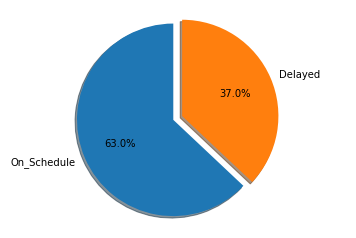

In [22]:
# Piechart for on-time & delay percentage
fig1,ax1= plt.subplots()
explode = (0.1, 0)
ax1.pie(Overall_Delay_chartds, labels=Schedule_Type, autopct='%.1f%%', startangle=90, shadow = True, explode = explode)
ax1.axis('equal')

plt.show()

**Observation: Pie Chart shows 37% flights delayed.**

In [23]:
# Part 2

# Further, Level of delays are added as dummy variables to see for each airline
# To the positive delayed flights from Q10, add time based delays. Categories are as below:
# short: 1-15 minutes
# Medium: 16-60 minutes
# High: above 60 minutes

# create dummy column for delay levels
FD_dep_delay['Delay_lvl'] = 'Short'
FD_dep_delay.loc[(FD_dep_delay.DEPARTURE_DELAY >=15)&(FD_dep_delay.DEPARTURE_DELAY <=60),'Delay_lvl']='Medium'
FD_dep_delay.loc[(FD_dep_delay.DEPARTURE_DELAY >=60),'Delay_lvl']='High'
FD_dep_delay.head()

,AIRLINE,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,Delay_lvl
3,EV,908,1.0,12.0,Short
7,OO,222,32.0,36.0,Medium
12,US,1916,13.0,7.0,Short
14,UA,1874,12.0,-18.0,Short
15,WN,317,6.0,0.0,Short


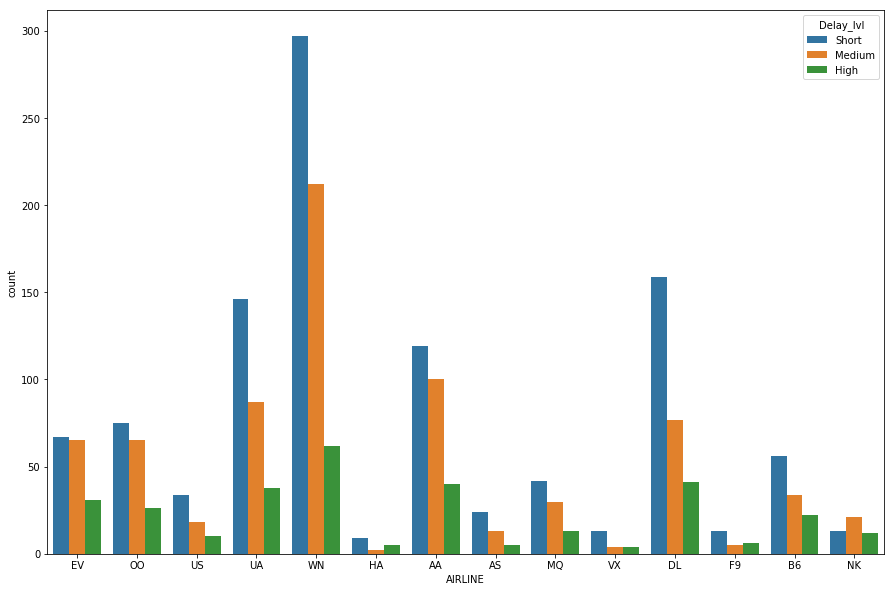

In [24]:
# Graph showing distribution of delay levels for each airline
fig = plt.figure(1, figsize=(15,10))
ax = sns.countplot(x="AIRLINE", hue='Delay_lvl', data=FD_dep_delay)

Observation: Graph shows most short delays, i.e. from 1 to 15 minutes for airlines. Also, longer than one hour delays are least. **Further, at first glance, predominantly, trend is high delays (longer than 1 hour) are one-third of the short delays.**  
Let's check the individual percentage of overall delay levels to see if our observation is correct.

In [25]:
# Part 3
# Overall percentage of delay levels

# Count type and frequency
Lvl_Delay_chart= FD_dep_delay['Delay_lvl'].value_counts()

Lvl_Delay_chartds= pd.Series(Lvl_Delay_chart) # Dataseries for value counts of unique dummy values
print ("Unique values are:", Lvl_Delay_chartds, sep='\n')

Lvl_Type = FD_dep_delay['Delay_lvl'].unique() # For Label

Unique values are:
Short     1067
Medium     733
High       315
Name: Delay_lvl, dtype: int64


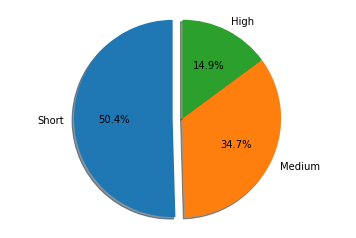

In [26]:
# Piechart of delay level percentage 
fig2,ax2= plt.subplots()
explode = (0.1, 0,0)
ax2.pie(Lvl_Delay_chartds, labels=Lvl_Type, autopct='%.1f%%', startangle=90, shadow = True, explode = explode)
ax2.axis('equal')

plt.show()

**Observation: Pie Chart shows 50% of the flights delayed are under 15 minutes.** Also, 15% of the flights are departure delays of more than an hour.  
Trend as seen in the bar graph was high delays are one third of short delays which is also seen in the pie chart.

#### 12. Is there a specific time (or time period) in the day when flight departures are usually delayed or are usually on time?

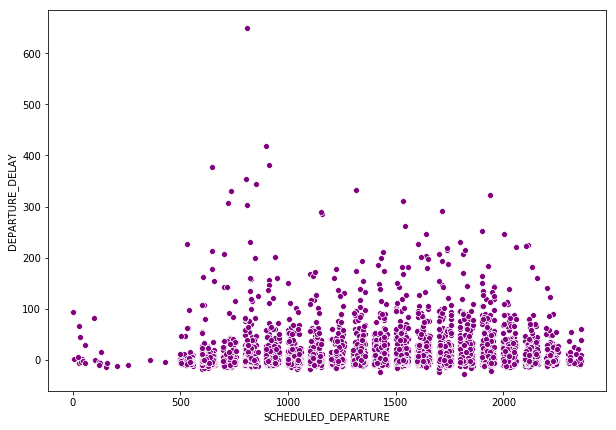

In [27]:
# Part 1: Scatter plot to diagnose a trend (if any)
# Part 2: Bar graph to see if trend shows any insight as per time slot of the day (morning, daytime, evening & late/early hours)

# Part 1
# Hourly scatter plot 
fig = plt.figure(1, figsize=(10,7))
ax = sns.scatterplot(x="SCHEDULED_DEPARTURE", y="DEPARTURE_DELAY", data=FlightData, color = "purple",marker = 'o')


Observation: Graph shows minimal delays particulary around 12am to 5am. Lets analyse time period wise

In [28]:
# Part 2
# further analysis by time period
# Morning :         6am to 12pm
# Daytime:          12pm to 6pm
# Evening :         6pm to 12pm
# Late/Early hours: 12pm to 6am

# creating parts of the day and adding to dataframe
FlightData['Time_Dummy'] = 'Late/Early_Hours'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 600) & (FlightData.SCHEDULED_DEPARTURE <= 1200),'Time_Dummy'] = 'Morning'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 1200) & (FlightData.SCHEDULED_DEPARTURE <= 1800),'Time_Dummy'] = 'Daytime'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 1800) & (FlightData.SCHEDULED_DEPARTURE <= 2400),'Time_Dummy'] = 'Evening'
FlightData.loc[FlightData.SCHEDULED_DEPARTURE > 2400,'Time_Dummy'] = 'Late/Early_Hours'

FlightData.head(6)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Dep_Delay_Overall,Time_Dummy
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Morning
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delayed,Morning
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Morning
5,2015,1,1,4,DL,1806,N594NW,LAX,DTW,1115,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Morning
6,2015,1,1,4,AA,1509,N3BGAA,BWI,MIA,1309,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Daytime


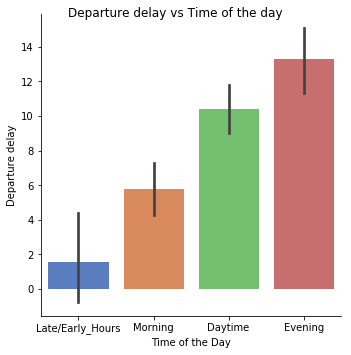

In [29]:
# graph of Departure delays vs Time period
ax = sns.catplot(x = 'Time_Dummy', y = 'DEPARTURE_DELAY', data = FlightData , kind = "bar", palette = "muted")

ax.set_xlabels('Time of the Day')
ax.set_ylabels('Departure delay')
ax.fig.suptitle('Departure delay vs Time of the day')

plt.show()


Observation: Graph shows an interesting pattern- a progressive delay with time of the day. We observe least delay from 12pm to 6am and most delays during evening.

# Part II: Regression Analysis

In [30]:
# remove records with null value in WEATHER DELAY
flights_new = FlightData.dropna(axis=0,subset=['WEATHER_DELAY'])

In [31]:
# check null data in new dataframe. Only CANCELLATION_REASON field has 1072 null values.
#
numrow=flights_new.shape[0]
missing = numrow - flights_new.count()
print(missing)

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
Dep_Delay_Overall         0
Time_Dummy                0
dtype: int64


In [32]:
# create dummy varibles for Airline categorical variable
#
airline_dummy =pd.get_dummies(flights_new['AIRLINE'])        # create dummy varibles for AIRLINE
flights_new =pd.concat([flights_new, airline_dummy], axis=1) # concatenate dummay variable with flights_new dataset
del flights_new['AA']   

In [33]:
flights_new.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Dep_Delay_Overall',
       'Time_Dummy', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO',
       'UA', 'US', 'VX', 'WN'],
      dtype='object')

In [34]:
import statsmodels.api as sm
X = flights_new[['LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'DAY_OF_WEEK', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'DISTANCE','AS', 'B6', 'DL', 'EV', 'F9',
       'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN']]
y=flights_new['ARRIVAL_DELAY']
X_int = sm.add_constant(X)
linreg1 = sm.OLS(y, X_int).fit()
linreg1.summary()

/Users/anupahire/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.292e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:26:08   Log-Likelihood:                -2143.1
No. Observations:                1072   AIC:                             4330.
Df Residuals:                    1050   BIC:                             4440.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5515      0.287      1.920      0.055      -0.012       1.115
LATE_AIRCRAFT_DELAY     0.9812      0.004    251.863      0.000       0.974       0.989
AIRLINE_DELAY           0.9819      0.004    258.890      0.000       0.974       0.989
AIR_SYSTEM_DELAY        0.9851      0.003    312.534      0.000       0.979       0.991
WEATHER_DELAY           0.9842      0.004    239.704      0.000       0.976       0.992
DAY_OF_WEEK            -0.0320      0.028     -1.127      0.260      -0.088       0.024
DEPARTURE_TIME         -0.0001      0.000     -0.909      0.364      -0.000       0.000
DEPARTURE_DELAY         0.0160      0.003      4.697      0.000       0.009       0.023
DISTANCE                0.0001      0.000      1.078      0.281   -9.01e-05       0.000
AS                      1.8508      0.432      4.282      0.000       1.003       2.699
B6                     -0.0082      0.276     -0.030      0.976      -0.549       0.533
DL                     -0.2441      0.224     -1.090      0.276      -0.683       0.195
EV                     -0.1395      0.241     -0.579      0.563      -0.612       0.333
F9                     -0.0320      0.444     -0.072      0.943      -0.904       0.840
HA                     -0.1580      0.547     -0.289      0.773      -1.230       0.914
MQ                     -0.1346      0.294     -0.457      0.648      -0.712       0.443
NK                      0.4646      0.331      1.402      0.161      -0.186       1.115
OO                     -0.1250      0.240     -0.520      0.603      -0.596       0.346
UA                     -0.3681      0.233     -1.581      0.114      -0.825       0.089
US                     -0.1911      0.319     -0.600      0.549      -0.816       0.434
VX                     -0.0841      0.544     -0.155      0.877      -1.152       0.984
WN                     -0.1901      0.198     -0.959      0.338      -0.579       0.199
==============================================================================
Omnibus:                     2222.999   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4344520.011
Skew:                          16.618   Prob(JB):                         0.00
Kurtosis:                     313.098   Cond. No.                     2.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation: DAY_OF_WEEK, DEPARTURE_TIME, DISTANCE, AIRLINE (except AS) have p-value higher than 0.05 which makes them insignificant for prediction of ARRIVAL DELAY.

from the model diagnosis, LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, AIR_SYSTEM_DELAY, WEATHER_DELAY, DEPARTURE_DELAY and AS variables have p-value less than 0.05 which make them seem significant for the regression model. 

#### Provide interpretations for a few of of the coefficients, and comment on whether they make sense.

Interpretation: When LATE_AIRCRAFT_DELAY is 1 minute keeping all other variables constant, then flight will be delayed by 0.98 minutes. When DEPARTURE_DELAY is of 1 minute, keeping all other variables constant, we can predict that arrival delay will be -0.0001 seconds, in other words if departure delay is of 1 minute then arrival time wil be preponed by few microseconds. When day od week increases by 1, then arrival delay decreases by 0.03 min, which does not make sense.

Text(0.5, 1.0, 'Residuls vs Fitted values')

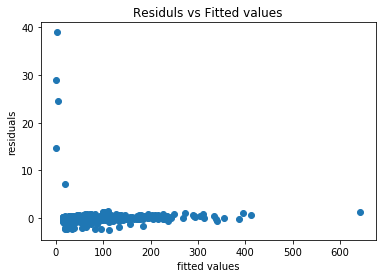

In [35]:
plt.scatter(linreg1.fittedvalues, linreg1.resid)
#plt.ylim(-1, 1)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residuls vs Fitted values')

Observation: the residual vs fitted values plot shows that error terms does not follow homoskedasticity assumption of linearity.

Text(0.5, 1.0, 'qq plot')

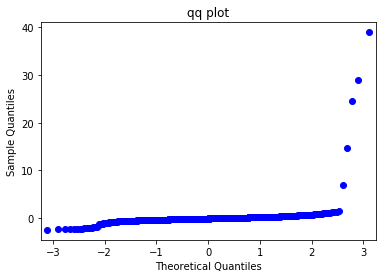

In [36]:
fig=sm.qqplot(linreg1.resid)
plt.title('qq plot')

(-3, 3)

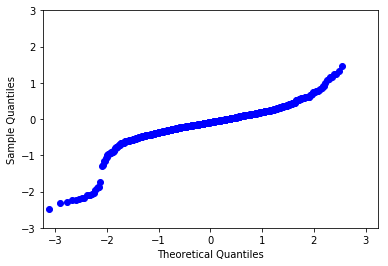

In [37]:
# Zooming in y axis of the sctterplot graph by considering residual values between 03 to 3
fig=sm.qqplot(linreg1.resid)
plt.ylim(-3,3)

Observation: QQ plot shows the error terms' deviation from normality assumtion 

# Subpart 2

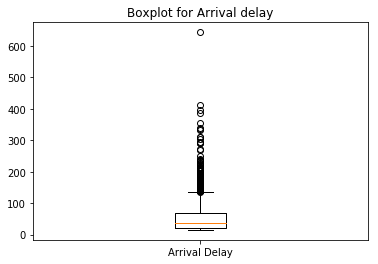

In [38]:
# boxplot of Arrival delay
#
plt.boxplot([flights_new.ARRIVAL_DELAY])
plt.xticks([1],['Arrival Delay'])
plt.title('Boxplot for Arrival delay')
plt.show()

In [39]:
# calculate IQR of arrival delay
IQR = flights_new.ARRIVAL_DELAY.quantile(0.75) - flights_new.ARRIVAL_DELAY.quantile(0.25)
print(IQR)

45.25


In [40]:
# drop outlier record from arrival delay dependent variable. 
# After removing outlier record, a new dataframe is created in order to run code multiple time for diagnosis
#
flights_clean = flights_new.drop(flights_new[flights_new['ARRIVAL_DELAY']> (flights_new.ARRIVAL_DELAY.quantile(0.75) + 1.5* IQR)].index)

In [41]:
# nbr of records in dataset after removing outliers
flights_clean.shape[0]

986

In [42]:
y_log = np.log(flights_clean.ARRIVAL_DELAY)

In [43]:
# fit regression model with statsmodels library to predict log value of arrival delay
#
X = flights_clean[['LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'DEPARTURE_DELAY']]
X_int = sm.add_constant(X)
linreg3 = sm.OLS(y_log, X_int).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2161.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:26:09   Log-Likelihood:                 343.09
No. Observations:                 986   AIC:                            -674.2
Df Residuals:                     980   BIC:                            -644.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7076    

Text(0.5, 1.0, 'residuals vs fitted values(log scale)')

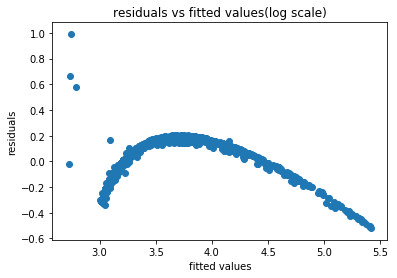

In [44]:
plt.scatter(linreg3.fittedvalues, linreg3.resid)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('residuals vs fitted values(log scale)')

Text(0.5, 1.0, 'qq plot')

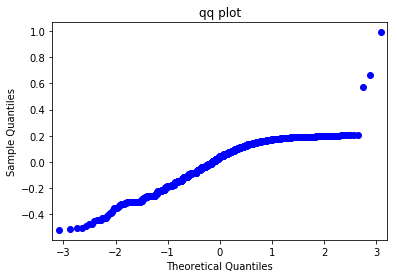

In [45]:
fig = sm.qqplot(linreg3.resid)
plt.title('qq plot')

#### Perform model diagnostics. Did anything improve?

With response variable transformed to log scale, there is improvement in qq plot which shows normality of error terms. Still it is not enough to conclude normality assumption of linearity.
R-square value reduced to 0.917 (as compared to 0.99 in previous model), this is because reduction in number of predictor variables. F-statistics is also reduced as compared to previous model.
Skew is reduced to -0.367 from 16.618

#### Provide interpretations to a few of the coefficients. Do you think they make sense?

Interpretations: keeping all other variables constant, if LATE_AIRCRAFT_DELAY is 1 min then arrival delay will be around 0.02 minutes. similarly if DEPARTURE_DELAY is increased by 1 minute then arrival delay will incease by 0.0009 minute. It does not make any sense since the response variable arraival delay is in log scale for the model.

In [46]:
# Calculate predicted y (yhat) and convert it from log scale to normal scale
#
yhat = linreg3.predict(X_int)
predicted_y = np.exp(yhat)

Text(0.5, 1.0, 'residuals vs fitted values)')

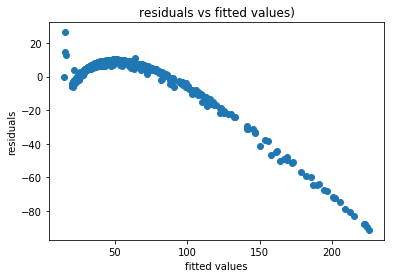

In [47]:
# sctterplot of residuals vs fitted values on normal scale
#
plt.scatter(predicted_y, flights_clean.ARRIVAL_DELAY - predicted_y)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('residuals vs fitted values)')

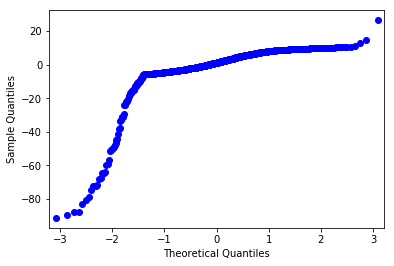

In [48]:
fig = sm.qqplot(flights_clean.ARRIVAL_DELAY - predicted_y)

To improve model further, stepwise regression should be done to add or remove variables from the model. 

Also from the data vizualisation we have seen that arrival delay has some pattern with time of day. It can be included in model to check if the model performance improve further. 

Day of week variable is an ordinal variable hence it should be converted to categorical varaible and its dummy variable can be added in model to study the effect of new variable in model further. 

Indicator variables Cancelled and Diverted should also be used to check their impact on arrival delay.